In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Gozzly Unclean Sales Data.csv",encoding='unicode_escape')

# Data Cleaning 

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Orders,Amount,Product1,Cust_Address,Security No
0,2002903,Sanskriti,G00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,1,23952.0,NaN,NaN,NaN
1,2000732,Kartik,G00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,3,23934.0,NaN,NaN,NaN
2,2001990,Bindu,G00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,3,23924.0,NaN,NaN,NaN
3,2001425,Sudevi,G00237842,M,0-17,16,0,Karnataka,Southern,Construction,2,23912.0,NaN,NaN,NaN
4,2000588,Joni,G00057942,M,26-35,28,1,Gujarat,Western,Food Processing,2,23877.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,2000695,Manning,G00296942,M,18-25,19,1,Maharashtra,Western,Chemical,4,370.0,NaN,NaN,NaN
11247,2004089,Reichenbach,G00171342,M,26-35,33,0,Haryana,Northern,Healthcare,3,367.0,NaN,NaN,NaN
11248,2001209,Oshin,G00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,4,213.0,NaN,NaN,NaN
11249,2004023,Noonan,G00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,3,206.0,NaN,NaN,NaN


In [4]:
df.drop(columns=["Product1","Cust_Address","Security No",'User_ID','Product_ID','Zone'],axis=1,inplace=True)
df

,Cust_name,Gender,Age Group,Age,Marital_Status,State,Occupation,Orders,Amount
0,Sanskriti,F,26-35,28,0,Maharashtra,Healthcare,1,23952.0
1,Kartik,F,26-35,35,1,Andhra Pradesh,Govt,3,23934.0
2,Bindu,F,26-35,35,1,Uttar Pradesh,Automobile,3,23924.0
3,Sudevi,M,0-17,16,0,Karnataka,Construction,2,23912.0
4,Joni,M,26-35,28,1,Gujarat,Food Processing,2,23877.0
...,...,...,...,...,...,...,...,...,...
11246,Manning,M,18-25,19,1,Maharashtra,Chemical,4,370.0
11247,Reichenbach,M,26-35,33,0,Haryana,Healthcare,3,367.0
11248,Oshin,F,36-45,40,0,Madhya Pradesh,Textile,4,213.0
11249,Noonan,M,36-45,37,0,Karnataka,Agriculture,3,206.0


In [5]:
df.shape

(11251, 9)

In [6]:
df=df.drop_duplicates()
df.shape

(11241, 9)

In [7]:
df.isna().sum()

Cust_name          0
Gender             0
Age Group          0
Age                0
Marital_Status     0
State              0
Occupation         0
Orders             0
Amount            12
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isna().sum()

Cust_name         0
Gender            0
Age Group         0
Age               0
Marital_Status    0
State             0
Occupation        0
Orders            0
Amount            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11229 entries, 0 to 11250
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_name       11229 non-null  object 
 1   Gender          11229 non-null  object 
 2   Age Group       11229 non-null  object 
 3   Age             11229 non-null  int64  
 4   Marital_Status  11229 non-null  int64  
 5   State           11229 non-null  object 
 6   Occupation      11229 non-null  object 
 7   Orders          11229 non-null  int64  
 8   Amount          11229 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 877.3+ KB


In [11]:
df["Amount"]=df["Amount"].astype(int)

In [12]:
df.columns

Index(['Cust_name', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State',
       'Occupation', 'Orders', 'Amount'],
      dtype='object')

In [13]:
df.to_csv("Gozzly Clean Sales Data")

# Exploratory Data Analysis

# # Gender count

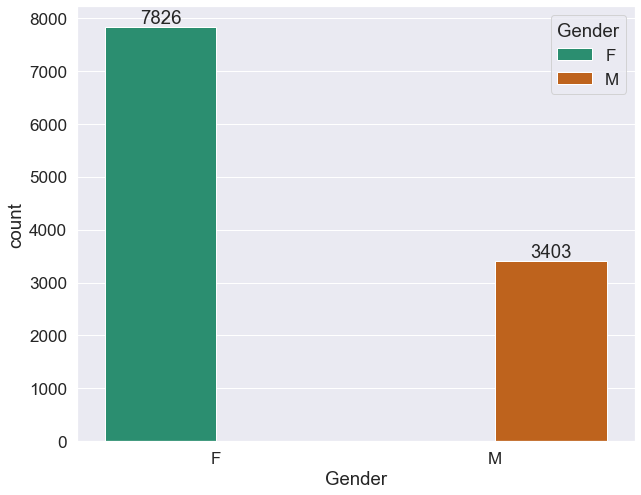

In [14]:
plt.figure(figsize=[10,8])
sns.set_style("darkgrid")

sns.set_context("notebook",font_scale=1.55)
ax=sns.countplot(x='Gender',data=df,hue="Gender",palette='Dark2')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

### As per the data, we can say that Females have spend more as compared to Male

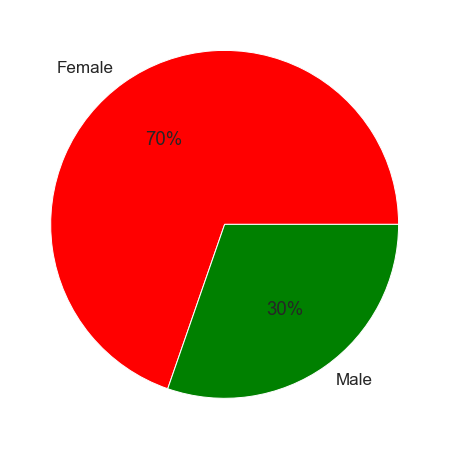

In [15]:
plt.figure(figsize=[10,8])
sns.set_style("darkgrid")

sns.set_context("notebook",font_scale=1.55)
y=df["Gender"].value_counts()
Y=["Female","Male"]
plt.pie(x=y,data=df,labels=Y,colors="rgb",autopct="%.0f%%")

plt.show()

###  As per the data, we can say that Females have spend more as compared to Male.

## Age  

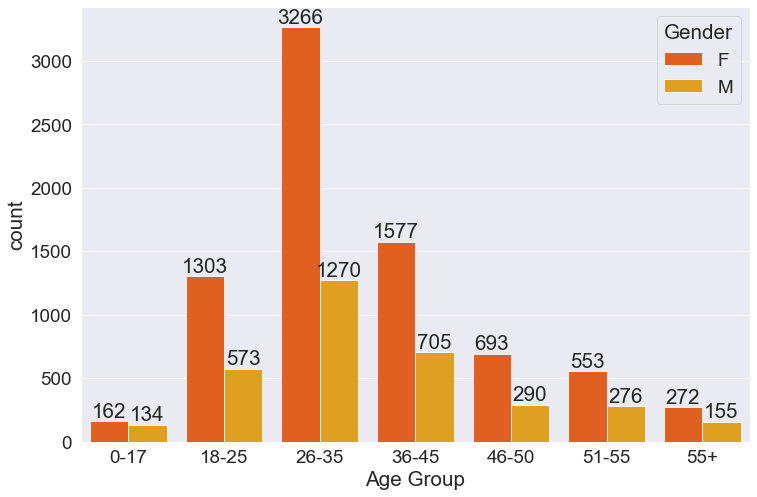

In [16]:
plt.figure(figsize=[12,8])
sns.set_style("darkgrid")
sns.set_context("paper",font_scale=2.15)
y=["0-17","18-25","26-35","36-45","46-50","51-55","55+"]
ax=sns.countplot(x = 'Age Group',data = df, hue = 'Gender',palette='autumn',order=y)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

## Purchasing Power of Men and Women

In [17]:
sales1 = df.groupby(['Age Group'])['Amount'].mean().sort_values(ascending=False)
sales1=sales1.reset_index()

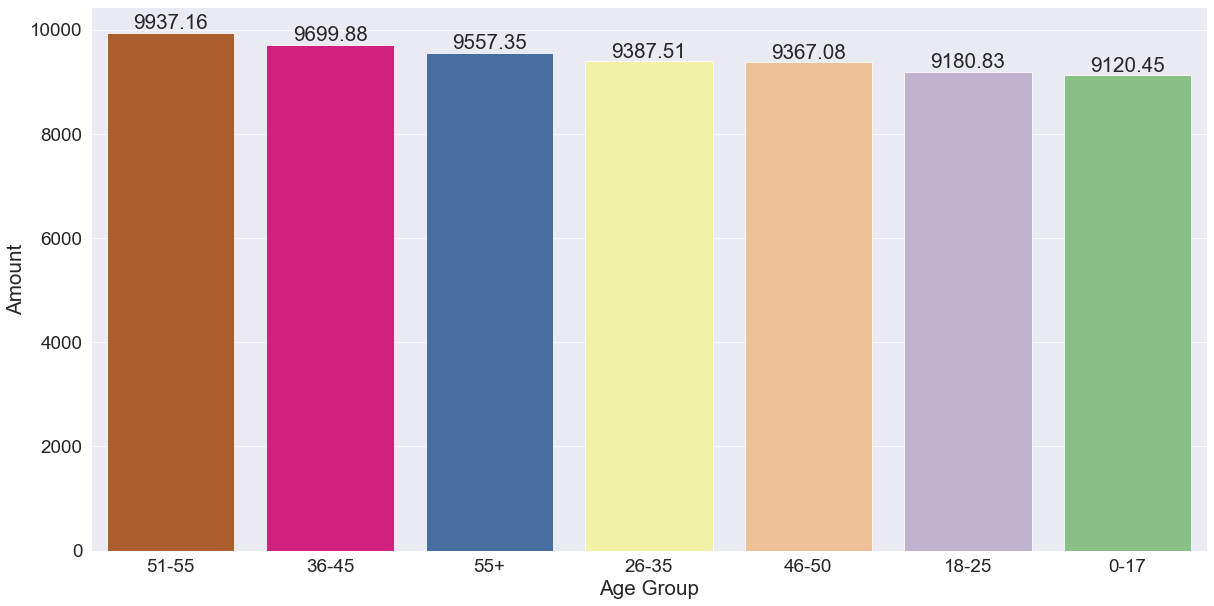

In [18]:
plt.figure(figsize=[20,10])
ax=sns.barplot(x="Age Group",y="Amount",data=sales1,palette='Accent_r')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

### Men and Women of age group 51-55 have more purchasing power as others compared.


## Amount of Money spend by Men and Women 

In [19]:
sales2 = df.groupby(['Age Group'])['Amount'].sum().sort_values(ascending=False)
sales2=sales2.reset_index()

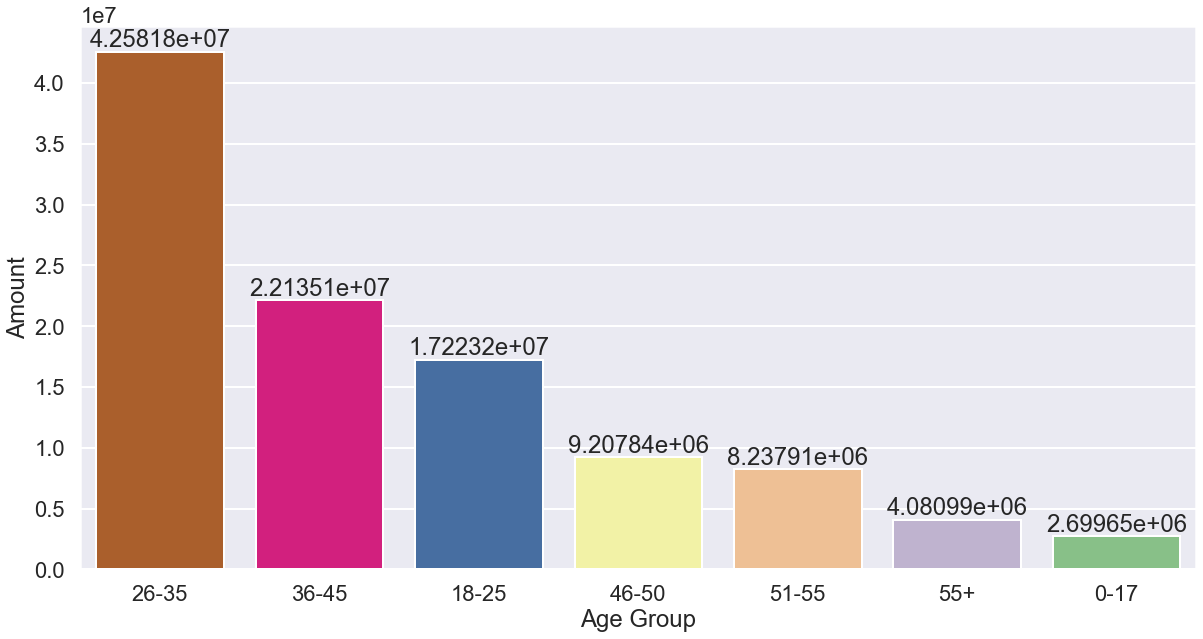

In [20]:
plt.figure(figsize=[20,10])
sns.set_context("poster",font_scale=1)
ax=sns.barplot(x="Age Group",y="Amount",data=sales2,palette='Accent_r')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

### Men and Women of age group 26-35 have spend most amout of money. 

## State

In [21]:
sales_state = df.groupby(['State'])['Orders'].sum().sort_values(ascending=False).head(5)
sales_state=sales_state.reset_index()
sales_state

,State,Orders
0,Uttar Pradesh,4801
1,Maharashtra,3795
2,Karnataka,3240
3,Delhi,2740
4,Madhya Pradesh,2252


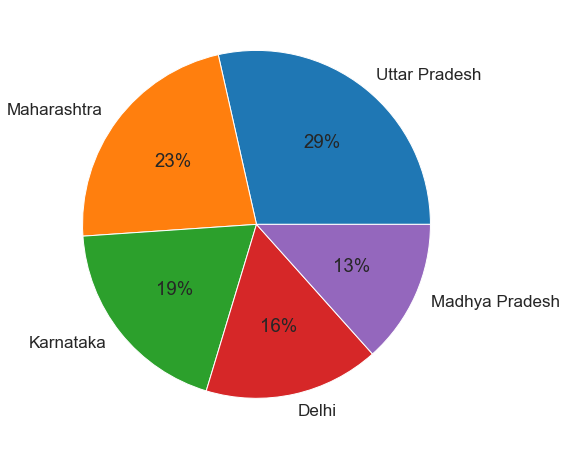

In [22]:
plt.figure(figsize=[10,8])
sns.set_style("darkgrid")

sns.set_context("notebook",font_scale=1.55)
y1=sales_state["Orders"]
plt.pie(x=y1,data=sales_state,labels="State",autopct="%.0f%%")


plt.show()

## Uttar Pradesh Has the highest number of orders. 

# Marital Status

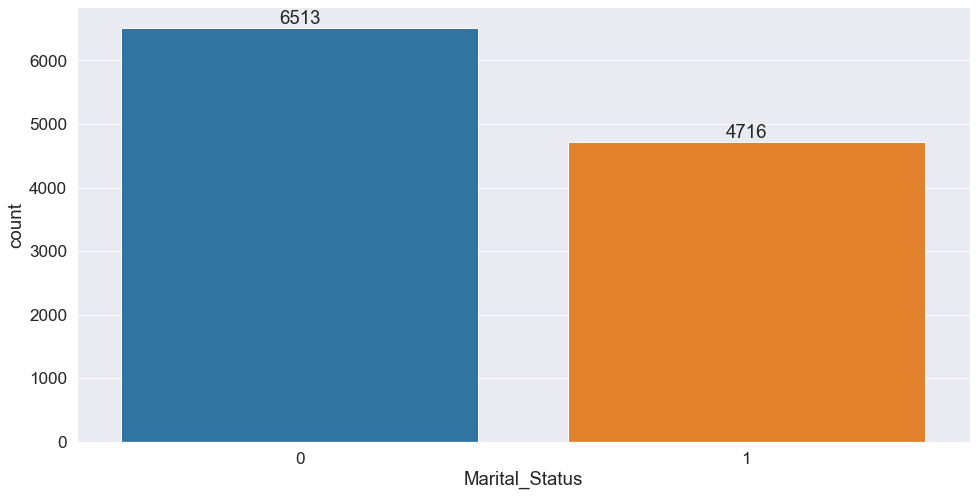

In [23]:
plt.figure(figsize=[16,8])
ax=sns.countplot(data = df, x = 'Marital_Status')
for i in ax.containers:
    ax.bar_label(i)

plt.show()

## 0 means No(False) and 1 means Yes(True). So , as per that, we can say that Unmarried men and women buy more products.

# Occupation

In [24]:
df1=df["Occupation"].value_counts().head(5)
df1=df1.reset_index()
df1

,index,Occupation
0,IT Sector,1581
1,Healthcare,1408
2,Aviation,1309
3,Banking,1137
4,Govt,854


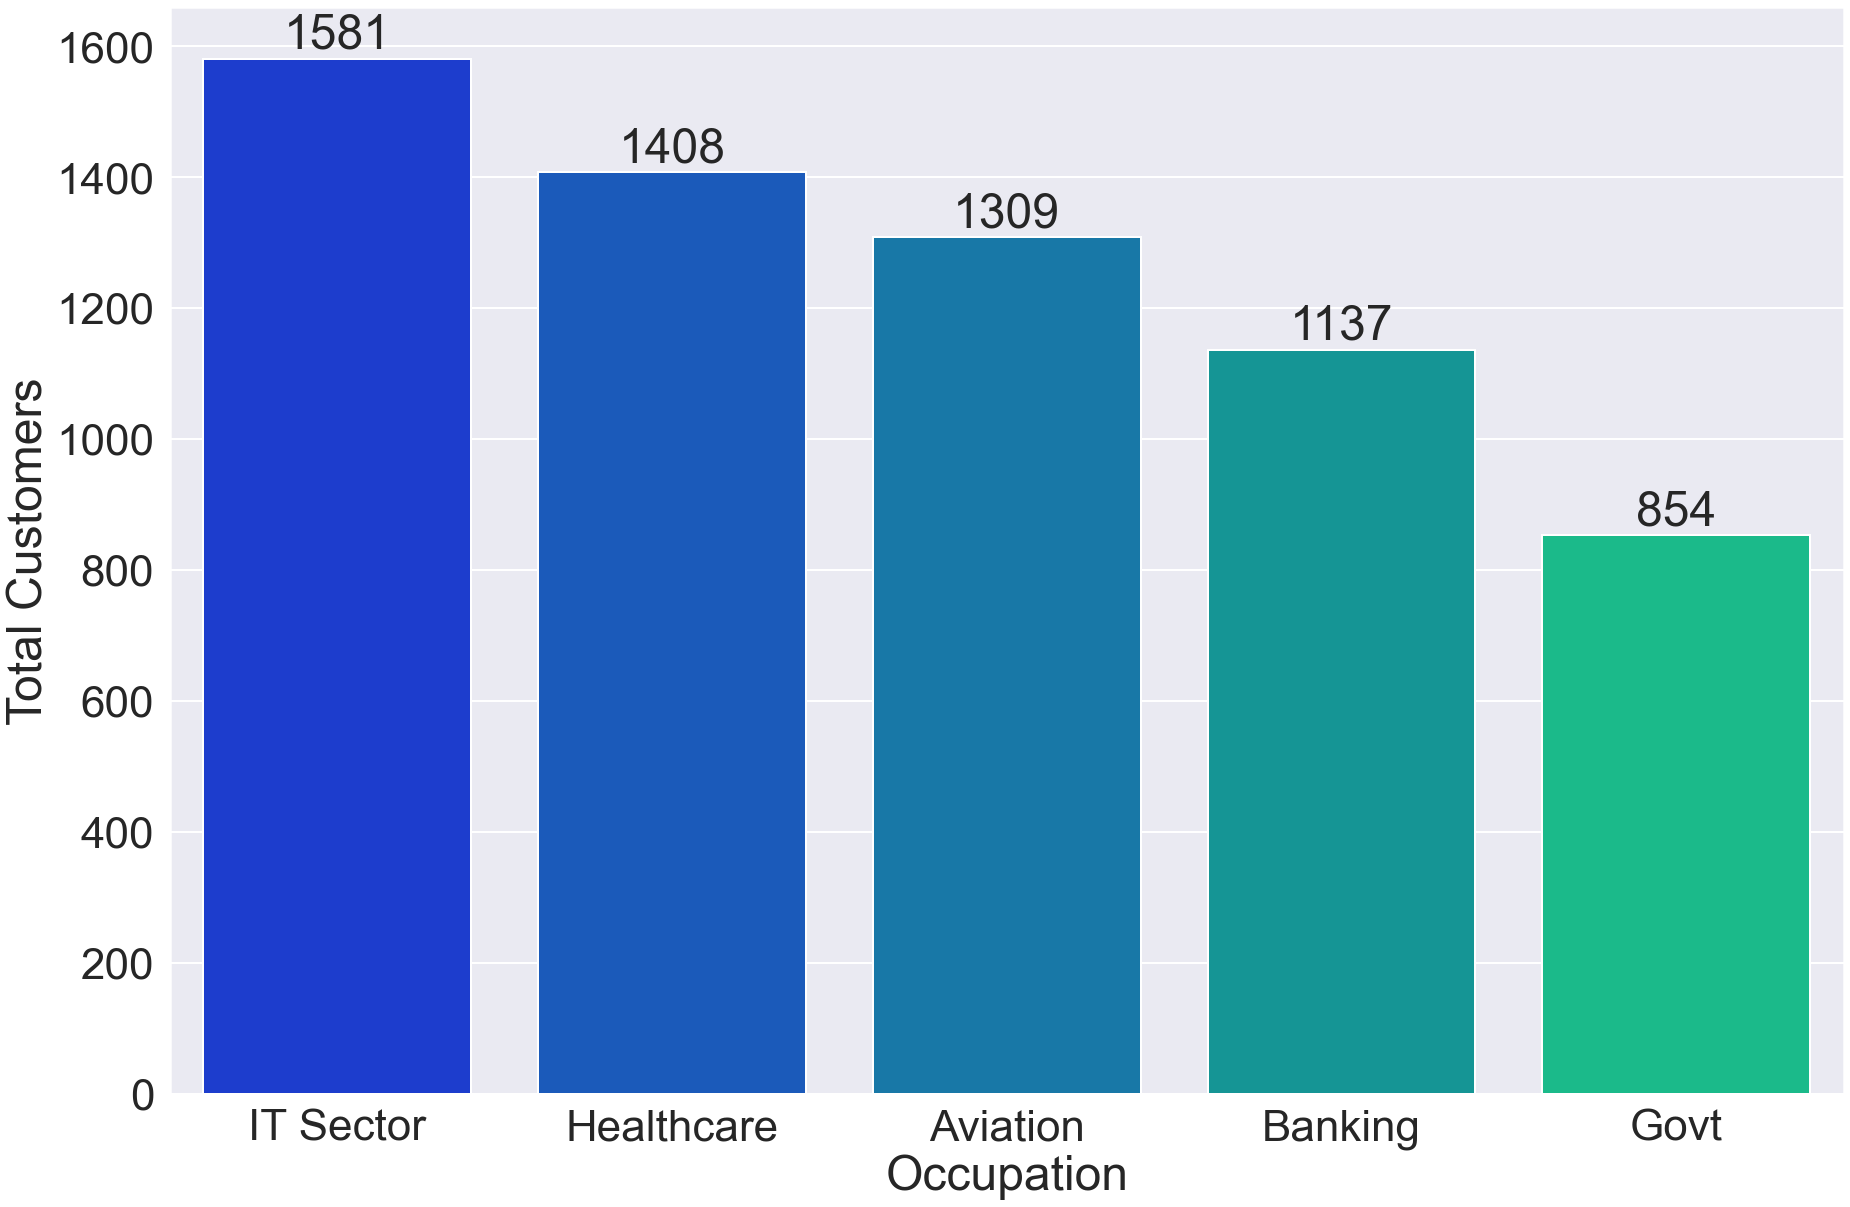

In [25]:
plt.figure(figsize=[30,20])
sns.set_context("poster",font_scale=2.0)
ax=sns.barplot(x="index",y="Occupation",data=df1,palette='winter')
plt.xlabel("Occupation")
plt.ylabel("Total Customers")

for i in ax.containers:
    ax.bar_label(i)

plt.show()

## highest amount of customers come from IT Sector 